In [66]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

pd.set_option('display.max_colwidth', None)
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000014/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000016/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data.columns
run_data2.columns

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'spread', 'omp_proc_bind', 'size', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'GF_RawTotal', 'GF_Total', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,spread,omp_proc_bind,size,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,GF_Total,GF_t_o,runtime[sec],job_id,status
0,14,JRDC,2022-gps,1,64,2,1,close,default,191.961,181.375,41.9139,223.289,220.996,6.29024,27.0257,42.3439,30.0422,29.4457,29.1433,601.79,10447297,NaN
1,14,JRDC,2022-gps,1,128,1,1,close,default,383.921,220.406,50.9334,271.339,268.754,7.31429,26.6938,41.8715,37.9623,35.7825,35.4416,990.72,10447298,NaN
2,14,JRDC,2022-gps,2,64,2,1,close,default,383.921,363.614,84.0271,447.641,443.028,28.38520,54.4974,81.4646,57.5240,59.0321,58.4238,604.09,10447299,NaN
3,14,JRDC,2022-gps,2,128,1,1,close,default,767.842,429.419,99.2336,528.652,523.460,14.16710,53.5224,81.5948,73.9424,69.7167,69.0319,1025.69,10447300,NaN
4,14,JRDC,2022-gps,4,64,2,1,close,default,767.842,705.472,163.0260,868.499,859.872,36.56590,108.8680,162.4490,113.4380,114.5340,113.3970,620.31,10447301,NaN
5,14,JRDC,2022-gps,4,128,1,1,close,default,1535.680,849.091,196.2140,1045.300,1035.290,36.61600,106.9440,164.4300,142.3000,137.8540,136.5330,1043.25,10447302,NaN


,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,spread,omp_proc_bind,size,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,GF_RawTotal,GF_Total,runtime[sec],job_id,status
0,16,JRDC,2022-ips,1,64,2,1,close,default,119.984,181.773,42.0060,223.779,221.366,6.54256,27.5127,40.6103,30.1677,29.5100,29.1918,378.84,10448361,NaN
1,16,JRDC,2022-ips,1,128,1,1,close,default,239.968,218.399,50.4697,268.869,266.049,6.99632,26.9213,42.1595,37.6399,35.4565,35.0847,627.76,10448362,NaN
2,16,JRDC,2022-ips,2,64,2,1,close,default,239.968,367.584,84.9447,452.529,447.655,12.20120,55.2687,84.4821,61.2544,59.6763,59.0336,376.33,10448363,NaN
3,16,JRDC,2022-ips,2,128,1,1,close,default,479.935,425.457,98.3181,523.775,518.574,11.58970,54.0932,82.5585,74.5856,69.0731,68.3872,647.58,10448364,NaN
4,16,JRDC,2022-ips,4,64,2,1,close,default,479.935,711.901,164.5120,876.412,867.175,19.13430,110.7520,163.2980,121.3830,115.5770,114.3590,386.97,10448365,NaN
5,16,JRDC,2022-ips,4,128,1,1,close,default,959.871,858.713,198.4380,1057.150,1046.520,23.34720,107.4930,165.9770,150.7260,139.4150,138.0130,643.50,10448366,NaN


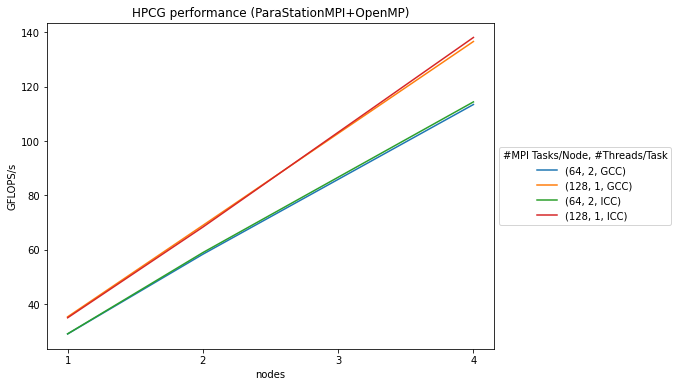

In [67]:
display(run_data)
display(run_data2)
fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance (ParaStationMPI+OpenMP)")

for label, df in run_data.groupby(['taskspernode', 'threadspertask']):
    label = (label[0], label[1], "GCC")
    x = df.plot(x="nodes", y="GF_t_o", ax=ax, label=label)
for label, df in run_data2.groupby(['taskspernode', 'threadspertask']):
    label = (label[0], label[1], "ICC")
    x = df.plot(x="nodes", y="GF_Total", ax=ax, label=label)
plt.legend(title='#MPI Tasks/Node, #Threads/Task', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [68]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000023/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data.columns

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'spread', 'omp_proc_bind', 'size', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,JRDC,2022-nvps,1,64,2,30.7311
1,JRDC,2022-nvps,1,64,2,30.4937
2,JRDC,2022-nvps,1,64,2,30.4049
3,JRDC,2022-nvps,1,64,2,30.6226
4,JRDC,2022-nvps,1,64,2,31.2676
5,JRDC,2022-nvps,1,128,1,36.4931
6,JRDC,2022-nvps,1,128,1,36.4365
7,JRDC,2022-nvps,1,128,1,36.3346
8,JRDC,2022-nvps,1,128,1,36.2156
9,JRDC,2022-nvps,1,128,1,36.5687


,system,modules,nodes,taskspernode,threadspertask,GF_Total,gftotstddev
0,JRDC,2022-nvps,1,64,2,30.70398,0.33863
1,JRDC,2022-nvps,1,128,1,36.40970,0.13808
2,JRDC,2022-nvps,2,64,2,61.10644,0.18837
3,JRDC,2022-nvps,2,128,1,69.95544,0.27744
4,JRDC,2022-nvps,4,64,2,121.93100,0.59494
5,JRDC,2022-nvps,4,128,1,139.77820,0.51981


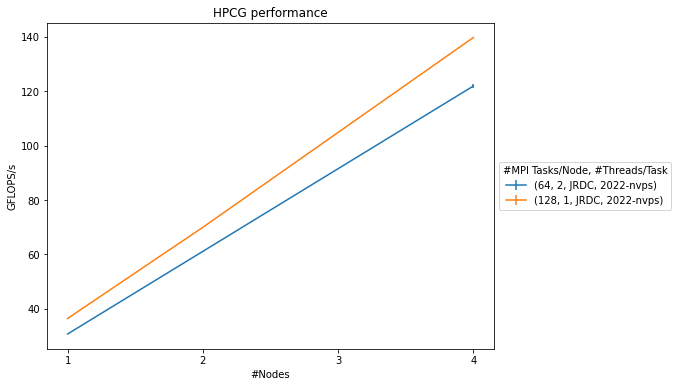

In [69]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance")

display(run_data[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])
grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
grouped_stddev = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).std().reset_index()
grouped = grouped.assign(gftotstddev=grouped_stddev['GF_Total'])
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total', 'gftotstddev']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, yerr=df['gftotstddev'])
ax.set_xlabel('#Nodes')
plt.legend(title='#MPI Tasks/Node, #Threads/Task', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [70]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

pd.set_option('display.max_colwidth', None)
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000018/result/table_csv.dat"
fname4 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000019/result/table_csv.dat"
fname5 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000022/result/table_csv.dat"
fname6 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000023/result/table_csv.dat"
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data3.columns
run_data4 = pd.read_csv(fname4, sep=",", engine='python')
run_data4.columns
run_data5 = pd.read_csv(fname5, sep=",", engine='python')
run_data5.columns
run_data6 = pd.read_csv(fname6, sep=",", engine='python')
run_data6.columns

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'spread', 'omp_proc_bind', 'size', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,nodes,taskspernode,threadspertask,jube_benchmark_id,spread,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,runtime[sec],job_id,status
0,1,64,2,18.0,1.0,119.984,183.3264,42.36484,225.6912,223.2830,6.44145,27.60100,42.35194,30.36830,2.15088,7.36634,6.10962,29.76210,29.44452,376.904,10449160.0,NaN
1,1,128,1,18.0,1.0,239.968,220.8120,51.02728,271.8390,269.0392,7.60019,26.89972,42.71262,37.79140,2.42138,16.56826,10.15539,35.84826,35.47902,623.782,10449165.0,NaN
2,2,64,2,19.0,1.0,239.968,367.7050,84.97264,452.6776,447.8848,29.87880,55.68126,80.79250,58.28880,2.61310,7.59566,6.14097,59.69594,59.06394,375.230,10449490.0,NaN
3,2,128,1,19.0,1.0,479.935,433.2748,100.12464,533.3998,528.0588,14.07970,53.92406,82.73088,74.69546,4.28842,17.38974,12.12506,70.34234,69.63802,638.368,10449495.0,NaN
4,4,64,2,19.0,1.0,479.935,718.4996,166.03700,884.5366,875.3810,38.91420,110.96660,163.28360,115.45260,3.04728,8.98121,7.21385,116.64860,115.44120,382.764,10449500.0,NaN
5,4,128,1,19.0,1.0,959.871,853.5310,197.24040,1050.7700,1040.1380,49.24208,107.87100,163.71640,140.71800,4.93807,20.29548,13.66798,138.57380,137.17120,650.398,10449505.0,NaN


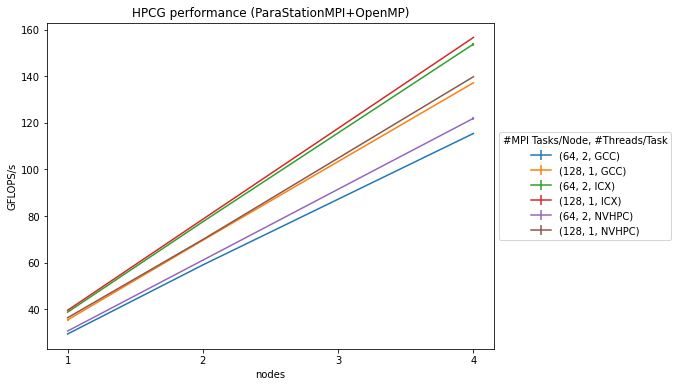

In [71]:
fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance (ParaStationMPI+OpenMP)")

merged = pd.concat([run_data3, run_data4])
display(merged.groupby(['nodes', 'taskspernode', 'threadspertask']).mean().reset_index())
gcc = merged.groupby(['nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
gcc_std = merged.groupby(['nodes', 'taskspernode', 'threadspertask']).std().reset_index()
gcc = gcc.assign(gftotstd=gcc_std['GF_Total'])

icx = run_data5.groupby(['nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
icx_std = run_data5.groupby(['nodes', 'taskspernode', 'threadspertask']).std().reset_index()
icx = icx.assign(gftotstd=icx_std['GF_Total'])

nvc = run_data6.groupby(['nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
nvc_std = run_data6.groupby(['nodes', 'taskspernode', 'threadspertask']).std().reset_index()
nvc = nvc.assign(gftotstd=nvc_std['GF_Total'])

for label, df in gcc.groupby(['taskspernode', 'threadspertask']):
    label = (label[0], label[1], "GCC")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, yerr=df['gftotstd'])
for label, df in icx.groupby(['taskspernode', 'threadspertask']):
    label = (label[0], label[1], "ICX")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, yerr=df['gftotstd'])
for label, df in nvc.groupby(['taskspernode', 'threadspertask']):
    label = (label[0], label[1], "NVHPC")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, yerr=df['gftotstd'])

plt.legend(title='#MPI Tasks/Node, #Threads/Task', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [77]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000024/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/eval/runs/000025/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
display(run_data.columns)
run_data = pd.concat([run_data, run_data2])

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'spread', 'omp_proc_bind', 'size', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,system,modules,nodes,taskspernode,threadspertask,GF_Total,gftotstddev
0,JRDC,2022-ips,1,8,16,17.5965,NaN
1,JRDC,2022-ips,1,16,8,27.9438,NaN
2,JRDC,2022-ips,1,32,4,37.5912,NaN
3,JRDC,2022-ips,1,64,2,39.4893,NaN
4,JRDC,2022-ips,1,128,1,39.1639,NaN
5,JRDC,2022-ips,4,8,16,59.2077,NaN
6,JRDC,2022-ips,4,16,8,100.1250,NaN
7,JRDC,2022-ips,4,32,4,138.8390,NaN
8,JRDC,2022-ips,4,64,2,156.1270,NaN
9,JRDC,2022-ips,4,128,1,156.4940,NaN


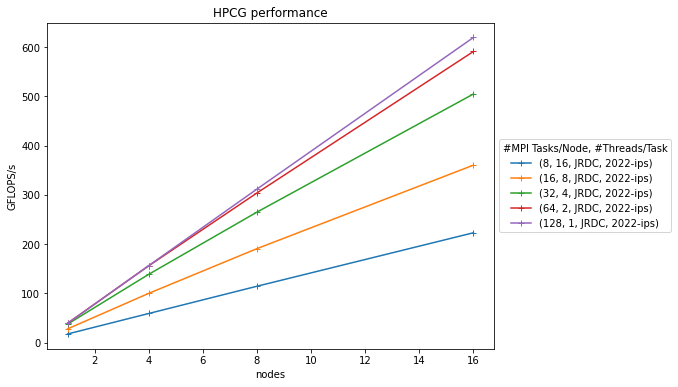

In [78]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
grouped_stddev = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).std().reset_index()
grouped = grouped.assign(gftotstddev=grouped_stddev['GF_Total'])
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total', 'gftotstddev']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker="+")
plt.legend(title='#MPI Tasks/Node, #Threads/Task', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [1]:
# constant local grid size per thread (core), i.e., each thread has always the same amount of work:
# as the number of OpenMP threads per MPI task is doubled, the number of MPI tasks is halved and
# the x dimension of the local grid size is doubled;
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000026/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000027/result/table_csv.dat"
#fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/bench_run/000028/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
#run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2])
display(run_data.columns)
#display(run_data.columns)
#display(run_data2.columns)
display(run_data)
#display(run_data2)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode',
       'threadspertask', 'spread', 'omp_proc_bind', 'size', 'tot_mem',
       'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY',
       'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce',
       'GF_RawTotal', 'GF_Total', 'runtime[sec]', 'job_id', 'status'],
      dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,spread,omp_proc_bind,size,tot_mem,...,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,runtime[sec],job_id,status
0,26,JRDC,2022-ips,1,16,8,1,close,default,191.944,...,41.0660,18.3955,1.434110,11.49340,7.29989,19.8434,19.5506,908.53,10572173,NaN
1,26,JRDC,2022-ips,1,32,4,1,close,default,191.950,...,41.1986,30.5871,1.483540,9.97665,6.43008,31.4427,31.1237,564.30,10572172,NaN
2,26,JRDC,2022-ips,1,64,2,1,close,default,191.961,...,41.7369,40.0429,0.443460,9.41048,5.47445,37.6005,37.3127,465.64,10572171,NaN
3,26,JRDC,2022-ips,1,128,1,1,close,default,191.983,...,42.1046,41.9665,0.731139,8.72246,3.23179,39.7193,39.4632,447.56,10572170,NaN
4,26,JRDC,2022-ips,2,16,8,1,close,default,383.888,...,82.0305,37.7268,1.854890,13.62630,9.23734,39.6562,39.0593,915.07,10572177,NaN
5,26,JRDC,2022-ips,2,32,4,1,close,default,383.899,...,82.7905,64.6888,1.790910,8.75267,5.84668,63.8679,63.1181,560.23,10572176,NaN
6,26,JRDC,2022-ips,2,64,2,1,close,default,383.921,...,82.9901,82.2477,1.949600,6.16159,3.76029,78.9856,78.2936,452.95,10572175,NaN
7,26,JRDC,2022-ips,2,128,1,1,close,default,383.967,...,84.2783,82.8148,1.200140,8.58643,4.35507,78.7293,78.1751,452.70,10572174,NaN
8,26,JRDC,2022-ips,4,16,8,1,close,default,767.774,...,164.7800,72.8545,2.013980,20.12020,13.38910,76.1451,75.0115,949.42,10572181,NaN
9,26,JRDC,2022-ips,4,32,4,1,close,default,767.797,...,166.6560,127.0170,2.730630,11.51190,6.80281,124.1740,120.3880,579.24,10572180,NaN


,system,modules,nodes,taskspernode,threadspertask,GF_Total,gftotstddev
0,JRDC,2022-ips,1,16,8,19.5506,NaN
1,JRDC,2022-ips,1,32,4,31.1237,NaN
2,JRDC,2022-ips,1,64,2,37.3127,NaN
3,JRDC,2022-ips,1,128,1,39.4632,NaN
4,JRDC,2022-ips,2,16,8,39.0593,NaN
5,JRDC,2022-ips,2,32,4,63.1181,NaN
6,JRDC,2022-ips,2,64,2,78.2936,NaN
7,JRDC,2022-ips,2,128,1,78.1751,NaN
8,JRDC,2022-ips,4,16,8,75.0115,NaN
9,JRDC,2022-ips,4,32,4,120.3880,NaN


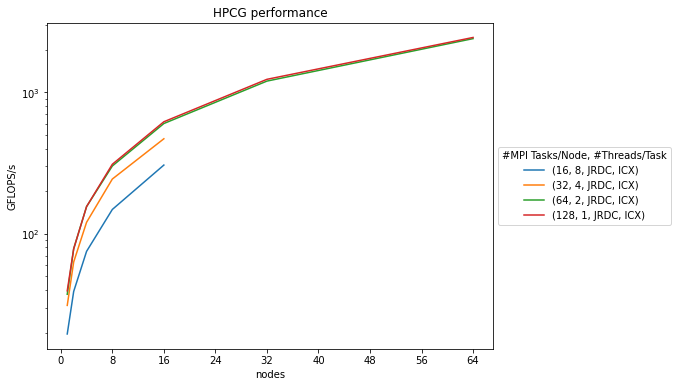

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
grouped_stddev = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).std().reset_index()
grouped = grouped.assign(gftotstddev=grouped_stddev['GF_Total'])
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total', 'gftotstddev']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[0], label[1], label[2], "ICX")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label)
plt.legend(title='#MPI Tasks/Node, #Threads/Task', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000072/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000078/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000079/result/table_csv.dat"
fname4 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000080/result/table_csv.dat"
fname5 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000081/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data4 = pd.read_csv(fname4, sep=",", engine='python')
run_data5 = pd.read_csv(fname5, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2, run_data3, run_data4, run_data5])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'omp_proc_bind', 'nx', 'ny', 'nz', 'size', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,omp_proc_bind,nx,ny,nz,size,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,72,JRDC,2022-io,1,32,4,NaN,128,128,128,default,47.9960,231.852,53.5791,285.431,281.855,8.70822,30.1243,41.1666,39.8408,6.12408,17.7257,11.79930,37.6383,37.1667,1,391.24,10748042,COMPLETED
1,72,JRDC,2022-io,1,64,2,NaN,128,128,128,default,95.9918,242.045,55.9343,297.980,295.508,7.26963,28.0164,41.8104,42.9028,2.24781,25.9808,14.05970,39.2945,38.9686,1,485.38,10748041,COMPLETED
2,72,JRDC,2022-io,1,128,1,NaN,128,128,128,default,191.9830,245.621,56.7603,302.381,300.370,27.94410,27.1794,42.2102,40.1936,3.24951,17.6203,7.72897,39.8757,39.6106,1,705.24,10748040,COMPLETED
0,78,JRDC,2022-io,2,32,4,NaN,128,128,128,NaN,95.9918,460.762,106.4830,567.246,549.534,18.50700,60.3923,82.4896,78.5833,8.72425,17.8940,13.17830,74.8020,72.4665,1,441.93,10761733,COMPLETED
1,78,JRDC,2022-io,2,64,2,NaN,128,128,128,NaN,191.9830,487.460,112.6470,600.107,595.021,18.33700,56.3727,83.6701,84.5214,10.96020,18.9066,14.42420,79.1377,78.4669,1,486.35,10761732,COMPLETED
2,78,JRDC,2022-io,2,128,1,NaN,128,128,128,NaN,383.9670,486.767,112.4860,599.253,595.209,21.00670,54.0122,83.9833,83.4541,3.13382,25.0425,11.00750,79.0265,78.4933,1,712.63,10761731,COMPLETED
3,78,JRDC,2022-io,4,32,4,NaN,128,128,128,NaN,191.9830,885.703,204.6870,1090.390,1056.270,24.72520,118.5160,164.3270,155.7500,8.72147,29.5519,21.45930,143.7910,139.2920,1,443.39,10761736,COMPLETED
4,78,JRDC,2022-io,4,64,2,NaN,128,128,128,NaN,383.9670,980.405,226.5600,1206.970,1196.550,34.24170,111.7750,167.8810,171.3300,11.37880,20.9618,14.42780,159.1690,157.7950,1,490.10,10761735,COMPLETED
5,78,JRDC,2022-io,4,128,1,NaN,128,128,128,NaN,767.9330,967.061,223.4760,1190.540,1169.380,31.84540,108.3250,169.5960,169.3620,4.84348,26.5622,13.29160,157.0050,154.2150,1,852.10,10761734,COMPLETED
0,79,JRDC,2022-io,1,32,4,NaN,160,128,128,NaN,59.9921,235.040,54.3157,289.355,285.757,9.94879,29.2822,41.2008,40.1153,8.44642,17.1101,11.94400,38.1561,37.6817,1,441.44,10761765,COMPLETED


,system,modules,nodes,taskspernode,threadspertask,nx,GF_Total
0,JRDC,2022-io,1,32,4,128,37.1667
1,JRDC,2022-io,1,32,4,160,37.6817
2,JRDC,2022-io,1,32,4,192,36.2732
3,JRDC,2022-io,1,32,4,256,37.4340
4,JRDC,2022-io,1,64,2,128,38.9686
5,JRDC,2022-io,1,64,2,160,39.8181
6,JRDC,2022-io,1,64,2,192,39.7041
7,JRDC,2022-io,1,64,2,256,39.1239
8,JRDC,2022-io,1,128,1,128,39.6106
9,JRDC,2022-io,1,128,1,160,39.4377


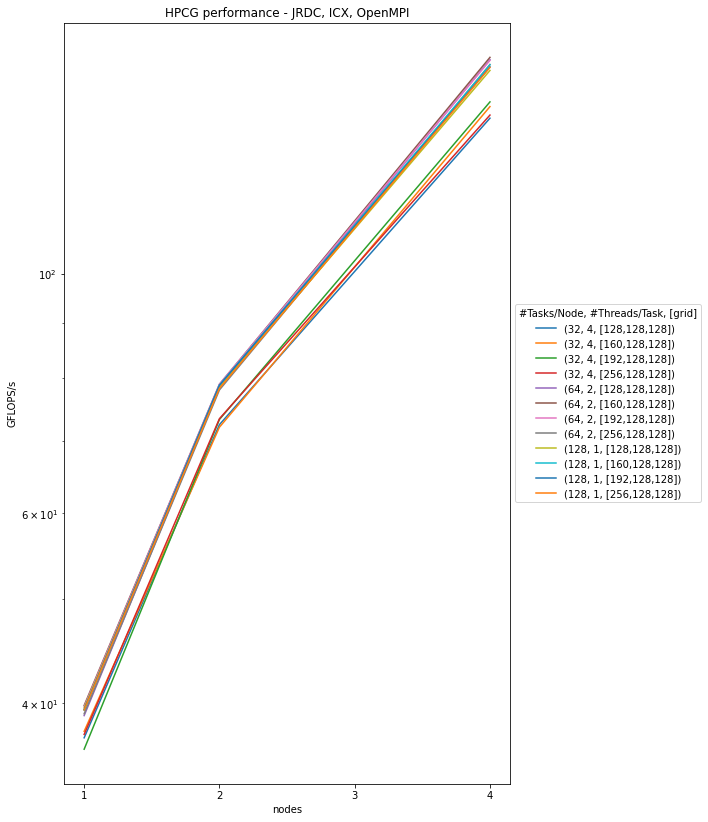

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,14))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, ICX, OpenMPI")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'nx']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'nx', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules', 'nx']):
    label = (label[0], label[1], "["+str(label[4])+",128,128]")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label)
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000082/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000083/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000084/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2, run_data3])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'omp_proc_bind', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,omp_proc_bind,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,82,JRDC,2022-ips,1,32,4,NaN,192.0,128.0,128.0,71.9883,229.725,53.0875,282.812,279.261,8.46117,28.5087,41.1877,39.5273,5.37938,18.1603,12.64960,37.2935,36.8252,1.0,438.35,10762254,COMPLETED
1,82,JRDC,2022-ips,1,64,2,NaN,192.0,128.0,128.0,143.9760,244.757,56.5608,301.318,298.745,14.83650,27.4174,41.5592,41.1432,4.59626,16.4636,10.22310,39.7352,39.3959,1.0,620.48,10762253,COMPLETED
2,82,JRDC,2022-ips,1,128,1,NaN,192.0,128.0,128.0,287.9520,245.176,56.6575,301.834,299.909,13.63700,26.7540,42.3748,41.3199,1.25329,18.2366,6.44856,39.8038,39.5500,1.0,854.42,10762252,COMPLETED
3,82,JRDC,2022-ips,2,32,4,NaN,192.0,128.0,128.0,143.9760,452.373,104.5440,556.916,539.537,27.72580,57.1267,82.7155,74.8032,10.43200,24.6172,15.75320,73.4409,71.1490,1.0,454.26,10762257,COMPLETED
4,82,JRDC,2022-ips,2,64,2,NaN,192.0,128.0,128.0,287.9520,487.065,112.5550,599.621,594.236,18.86350,54.8491,83.1231,84.3866,8.93092,23.1670,13.71600,79.0740,78.3639,1.0,627.26,10762256,COMPLETED
5,82,JRDC,2022-ips,2,128,1,NaN,192.0,128.0,128.0,575.9040,485.558,112.2070,597.765,594.019,27.12110,53.7243,83.9418,81.7726,2.45419,24.2408,9.95903,78.8308,78.3368,1.0,868.49,10762255,COMPLETED
6,82,JRDC,2022-ips,4,32,4,NaN,192.0,128.0,128.0,287.9520,895.078,206.8430,1101.920,1088.020,34.54770,113.6990,165.8500,152.4140,13.16850,25.9557,19.17720,145.3140,143.4800,1.0,450.54,10762260,COMPLETED
7,82,JRDC,2022-ips,4,64,2,NaN,192.0,128.0,128.0,575.9040,962.496,222.4220,1184.920,1174.480,52.75800,109.3780,166.5300,162.1240,12.34880,28.4210,17.21980,156.2620,154.8850,1.0,635.51,10762259,COMPLETED
8,82,JRDC,2022-ips,4,128,1,NaN,192.0,128.0,128.0,1151.8100,970.297,224.2230,1194.520,1186.770,48.35070,107.1320,167.1750,164.6910,6.18992,21.3019,10.22920,157.5310,156.5090,1.0,868.76,10762258,COMPLETED
0,83,JRDC,2022-ips,1,8,16,NaN,192.0,128.0,128.0,17.9973,102.400,23.6641,126.064,122.983,2.31513,48.3619,39.8425,16.7066,1.75728,34.6134,23.48550,16.6226,16.2163,1.0,389.77,10762499,COMPLETED


,system,modules,nodes,taskspernode,threadspertask,nx,GF_Total
0,JRDC,2022-ips,1,8,16,192.0,16.2163
1,JRDC,2022-ips,1,16,8,192.0,29.5377
2,JRDC,2022-ips,1,32,4,192.0,36.8252
3,JRDC,2022-ips,1,64,2,192.0,39.3959
4,JRDC,2022-ips,1,128,1,192.0,39.5500
5,JRDC,2022-ips,2,8,16,192.0,33.1250
6,JRDC,2022-ips,2,16,8,192.0,54.6205
7,JRDC,2022-ips,2,32,4,192.0,71.1490
8,JRDC,2022-ips,2,64,2,192.0,78.3639
9,JRDC,2022-ips,2,128,1,192.0,78.3368


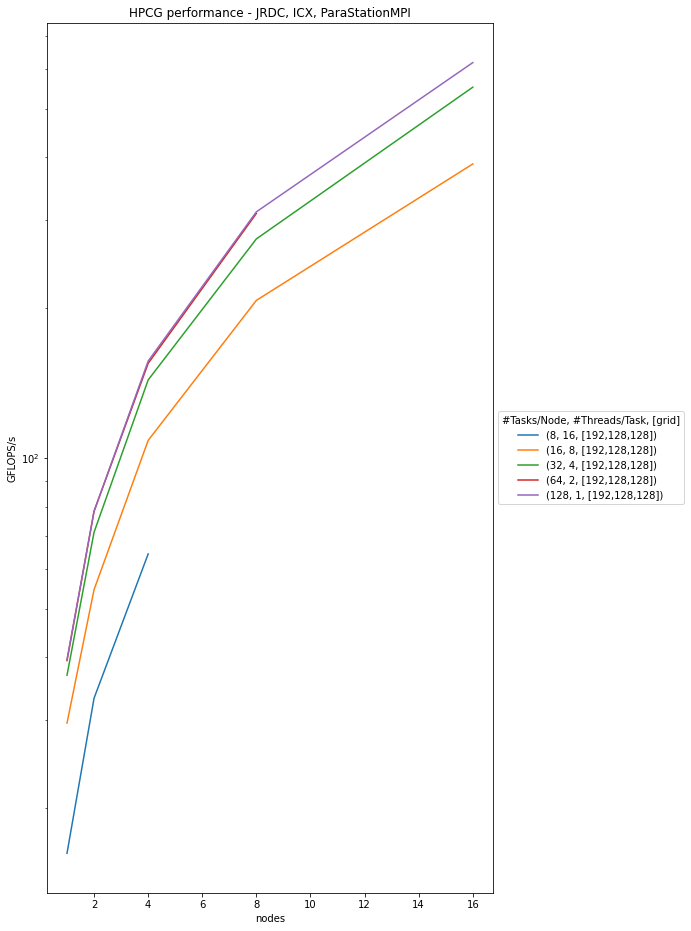

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,16))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, ICX, ParaStationMPI")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'nx']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'nx', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules', 'nx']):
    label = (label[0], label[1], "["+str(int(label[4]))+",128,128]")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label)
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000062/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000066/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000067/result/table_csv.dat"
fname4 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000070/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data4 = pd.read_csv(fname4, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2, run_data3, run_data4])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'omp_proc_bind', 'size', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,omp_proc_bind,size,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,62,JRDC,2022-go,1,8,2,NaN,default,251.090,11737.2,2711.90,14449.1,13007.2,1971.23,799.012,1501.95,2089.24,0.03557,0.07313,0.05346,1906.44,1716.19,1,704.44,10729756,COMPLETED
0,66,JRDC,2022-go,1,8,2,NaN,default,258.264,11863.1,2740.99,14604.1,13119.7,1921.46,798.186,1504.68,2120.35,0.04409,0.08500,0.07129,1926.89,1731.04,1,707.50,10740582,COMPLETED
1,66,JRDC,2022-go,1,8,2,NaN,default,265.438,11768.5,2719.13,14487.7,13047.9,1939.94,794.970,1515.26,2097.79,0.04841,0.08809,0.06470,1911.53,1721.56,1,731.48,10740583,COMPLETED
2,66,JRDC,2022-go,1,8,2,NaN,default,272.611,11807.7,2728.20,14535.9,13095.2,1986.50,791.523,1493.00,2106.81,0.04211,0.09166,0.07013,1917.90,1727.81,1,773.02,10740584,COMPLETED
3,66,JRDC,2022-go,1,8,2,NaN,default,279.785,11806.4,2727.89,14534.3,13094.5,1967.90,785.431,1496.13,2108.71,0.04274,0.06674,0.05565,1917.68,1727.72,1,791.98,10740585,COMPLETED
0,67,JRDC,2022-go,1,8,2,NaN,default,265.642,11868.3,2742.18,14610.5,13161.6,1955.07,783.880,1522.99,2118.23,0.04221,0.07798,0.06230,1927.73,1736.57,1,725.75,10740912,COMPLETED
1,67,JRDC,2022-go,1,8,2,NaN,default,273.231,11934.5,2757.48,14692.0,13233.3,1990.36,810.311,1493.33,2135.95,0.02938,0.07521,0.04377,1938.49,1746.02,1,777.38,10740913,COMPLETED
2,67,JRDC,2022-go,1,8,2,NaN,default,280.820,11918.6,2753.81,14672.4,13214.9,1923.64,785.839,1522.50,2125.06,0.05166,0.08706,0.06882,1935.91,1743.60,1,809.48,10740914,COMPLETED
3,67,JRDC,2022-go,1,8,2,NaN,default,288.410,11924.7,2755.20,14679.9,13221.9,1975.61,804.113,1508.06,2126.70,0.03687,0.06927,0.05165,1936.89,1744.52,1,831.90,10740915,COMPLETED
0,70,JRDC,2022-go,1,8,2,NaN,default,251.090,11747.8,2714.34,14462.1,13018.8,1967.65,799.346,1501.17,2091.49,0.13978,0.39639,0.26945,1908.16,1717.72,1,933.07,10741875,COMPLETED


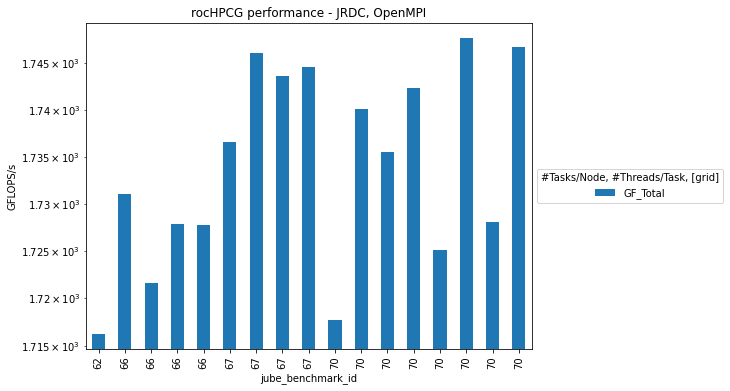

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('JUBE ID')
ax.set_ylabel('GFLOPS/s')
plt.title("rocHPCG performance - JRDC, OpenMPI")

run_data.plot(x="jube_benchmark_id", y="GF_Total", ax=ax, kind="bar")
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [1]:
#HPCG cuda on 1,2,4,8,16,32,40 nodes of JRDC
#HPCG cuda on 1,2,4,8,16,32,64,128,256,512 nodes of JWB
#grid size 512,280,280
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000088/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000090/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000091/result/table_csv.dat"
fname4 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000100/result/table_csv.dat"
fname5 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000101/result/table_csv.dat"
fname6 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000102/result/table_csv.dat"
fname7 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000103/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data4 = pd.read_csv(fname4, sep=",", engine='python')
run_data5 = pd.read_csv(fname5, sep=",", engine='python')
run_data6 = pd.read_csv(fname6, sep=",", engine='python')
run_data7 = pd.read_csv(fname7, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2, run_data3, run_data4, run_data5, run_data6, run_data7])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode',
       'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem',
       'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY',
       'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce',
       'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'],
      dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,...,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,88,JRDC,2022-go,1,4,16,True,512.0,280.0,280.0,...,1165.91,0.139657,0.238760,0.212269,1055.42,1034.31,1.0,800.67,10770622,COMPLETED
1,88,JRDC,2022-go,2,4,16,True,512.0,280.0,280.0,...,2266.05,0.199266,1.564230,0.851460,2061.91,1874.16,1.0,801.06,10770623,COMPLETED
2,88,JRDC,2022-go,4,4,16,True,512.0,280.0,280.0,...,4502.85,0.260802,3.271210,1.634040,4089.82,3718.03,1.0,802.64,10770624,COMPLETED
3,88,JRDC,2022-go,8,4,16,True,512.0,280.0,280.0,...,8836.66,0.529730,6.945060,3.045220,7933.51,7352.56,1.0,807.21,10770625,COMPLETED
4,88,JRDC,2022-go,16,4,16,True,512.0,280.0,280.0,...,17280.50,0.847418,11.250600,4.560930,15371.80,13988.60,1.0,804.60,10770626,COMPLETED
0,90,JRDC,2022-go,24,4,16,True,512.0,280.0,280.0,...,25879.50,1.912590,12.587600,4.947960,22919.30,20855.60,1.0,803.98,10771445,COMPLETED
0,91,JRDC,2022-go,32,4,16,True,512.0,280.0,280.0,...,33955.50,1.443420,15.717600,6.637830,29864.40,27219.90,1.0,806.65,10771516,COMPLETED
1,91,JRDC,2022-go,40,4,16,True,512.0,280.0,280.0,...,42939.40,3.023810,15.277900,6.373100,37748.20,34407.10,1.0,813.09,10771517,COMPLETED
2,91,JRDC,2022-go,48,4,16,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10771518,PENDING
0,100,JWB,2022-go,128,4,6,True,512.0,280.0,280.0,...,148100.00,0.942855,3.950420,1.733950,132938.00,120743.00,1.0,845.48,6037162,----------


,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,JRDC,2022-go,1,4,16,1034.31
1,JRDC,2022-go,2,4,16,1874.16
2,JRDC,2022-go,4,4,16,3718.03
3,JRDC,2022-go,8,4,16,7352.56
4,JRDC,2022-go,16,4,16,13988.60
5,JRDC,2022-go,24,4,16,20855.60
6,JRDC,2022-go,32,4,16,27219.90
7,JRDC,2022-go,40,4,16,34407.10
8,JRDC,2022-go,48,4,16,NaN
9,JWB,2022-go,1,4,6,1034.87


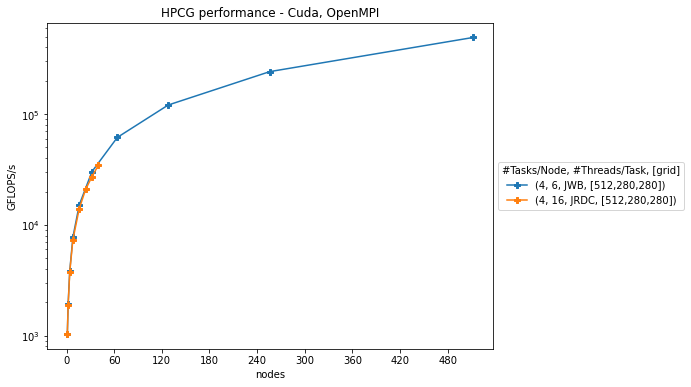

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - Cuda, OpenMPI")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[0], label[1], label[2], "[512,280,280]")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker="P")
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [44]:
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using GCC and OpenMPI (000089)
#grid size 256,128,128
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000089/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000092/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000093/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2, run_data3])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,89,JRDC,2022-go,1,16,8,True,256.0,128.0,128.0,47.9904,66.6554,15.4036,82.0589,81.1854,4.88844,29.5614,40.4027,9.66614,4.05583,11.5885,8.74921,10.8205,10.7053,1.0,645.98,10770635,COMPLETED
1,89,JRDC,2022-go,1,32,4,True,256.0,128.0,128.0,95.9805,118.9770,27.4946,146.4720,145.0170,6.59769,27.9042,40.8049,18.18440,9.34517,17.6863,15.12590,19.3149,19.1231,1.0,722.03,10770634,COMPLETED
2,89,JRDC,2022-go,1,64,2,True,256.0,128.0,128.0,191.9610,197.1370,45.5562,242.6930,240.0620,8.36182,27.0909,41.1293,32.64710,12.67550,17.0780,15.08450,32.0045,31.6575,1.0,715.93,10770633,COMPLETED
3,89,JRDC,2022-go,1,128,1,True,256.0,128.0,128.0,383.9210,226.6210,52.3697,278.9910,276.0530,10.98040,26.7069,41.3559,38.09070,13.79140,29.4160,22.75990,36.7916,36.4041,1.0,1239.02,10770632,COMPLETED
4,89,JRDC,2022-go,2,16,8,True,256.0,128.0,128.0,95.9805,131.7000,30.4348,162.1350,160.3710,9.64780,58.4422,81.1636,19.08690,5.78595,14.0414,12.24120,21.3803,21.1477,1.0,656.92,10770639,COMPLETED
5,89,JRDC,2022-go,2,32,4,True,256.0,128.0,128.0,191.9610,232.0930,53.6342,285.7270,282.8540,10.36070,55.9464,82.2129,35.84100,13.91450,22.0187,19.26140,37.6796,37.3006,1.0,741.54,10770638,COMPLETED
6,89,JRDC,2022-go,2,64,2,True,256.0,128.0,128.0,383.9210,371.1430,85.7671,456.9100,452.1040,16.23520,54.2321,84.0606,60.55850,12.08180,20.0648,16.87230,60.2545,59.6207,1.0,760.10,10770637,COMPLETED
7,89,JRDC,2022-go,2,128,1,True,256.0,128.0,128.0,767.8420,446.3020,103.1350,549.4370,543.7320,17.52370,53.1846,82.1309,76.09920,9.55222,40.5701,29.65380,72.4577,71.7054,1.0,1264.83,10770636,COMPLETED
8,89,JRDC,2022-go,4,16,8,True,256.0,128.0,128.0,191.9610,260.6590,60.2386,320.8980,311.1790,14.46610,116.9850,162.4770,38.23510,9.05818,16.0900,13.89160,42.3172,41.0356,1.0,674.62,10770643,COMPLETED
9,89,JRDC,2022-go,4,32,4,True,256.0,128.0,128.0,383.9210,457.1840,105.6550,562.8400,546.3080,16.99660,112.1880,164.1570,71.48760,15.33090,27.0145,23.42610,74.2232,72.0432,1.0,762.44,10770642,COMPLETED


,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,JRDC,2022-go,1,16,8,10.7053
1,JRDC,2022-go,1,32,4,19.1231
2,JRDC,2022-go,1,64,2,31.6575
3,JRDC,2022-go,1,128,1,36.4041
4,JRDC,2022-go,2,16,8,21.1477
5,JRDC,2022-go,2,32,4,37.3006
6,JRDC,2022-go,2,64,2,59.6207
7,JRDC,2022-go,2,128,1,71.7054
8,JRDC,2022-go,4,16,8,41.0356
9,JRDC,2022-go,4,32,4,72.0432


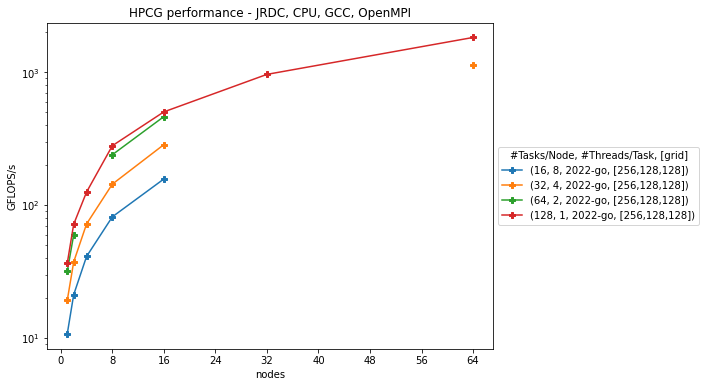

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, CPU, GCC, OpenMPI")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[0], label[1], label[3], "[256,128,128]")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker="P")
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [42]:
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using ICPX and ParaStationMPI
#grid size 256,128,128
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000094/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000095/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,94,JRDC,2022-ips,1,16,8,True,256.0,128.0,128.0,47.9904,180.554,41.7248,222.279,217.475,11.90800,29.8079,40.8382,28.6839,4.03686,16.2275,12.14990,29.3103,28.6768,1.0,419.43,10772657,COMPLETED
1,94,JRDC,2022-ips,1,32,4,True,256.0,128.0,128.0,95.9805,228.214,52.7434,280.957,266.931,8.12367,27.9397,41.3515,39.3356,7.99362,22.2152,15.36480,37.0485,35.1989,1.0,535.35,10772656,COMPLETED
2,94,JRDC,2022-ips,1,64,2,True,256.0,128.0,128.0,191.9610,243.593,56.2917,299.884,297.455,13.43670,27.0245,41.8393,41.0977,5.75518,20.0703,11.10260,39.5465,39.2261,1.0,702.96,10772655,COMPLETED
3,94,JRDC,2022-ips,1,128,1,True,256.0,128.0,128.0,383.9210,244.758,56.5609,301.319,299.467,14.34450,26.5386,42.5912,41.0840,2.28637,24.8916,9.66826,39.7361,39.4918,1.0,1139.31,10772654,COMPLETED
4,94,JRDC,2022-ips,2,16,8,True,256.0,128.0,128.0,95.9805,340.977,78.7967,419.773,410.971,22.55260,59.6479,81.7430,53.7239,5.59454,29.5349,18.62130,55.3544,54.1937,1.0,444.24,10772661,COMPLETED
5,94,JRDC,2022-ips,2,32,4,True,256.0,128.0,128.0,191.9610,449.930,103.9740,553.903,547.057,31.89240,55.8815,82.6584,73.8434,9.56656,26.6388,17.75960,73.0446,72.1417,1.0,527.69,10772660,COMPLETED
6,94,JRDC,2022-ips,2,64,2,True,256.0,128.0,128.0,383.9210,482.901,111.5930,594.494,589.725,18.35590,54.1253,83.2232,83.6670,9.06563,22.8190,13.84340,78.3981,77.7693,1.0,709.57,10772659,COMPLETED
7,94,JRDC,2022-ips,2,128,1,True,256.0,128.0,128.0,767.8420,484.011,111.8490,595.860,592.185,26.09150,53.2011,83.6872,81.7005,2.21663,33.2076,14.49260,78.5798,78.0952,1.0,1151.98,10772658,COMPLETED
8,94,JRDC,2022-ips,4,16,8,True,256.0,128.0,128.0,191.9610,676.762,156.3930,833.155,815.617,25.31660,119.8770,163.8880,110.4520,9.78812,31.1082,20.21200,109.8700,107.5570,1.0,449.66,10772665,COMPLETED
9,94,JRDC,2022-ips,4,32,4,True,256.0,128.0,128.0,383.9210,897.110,207.3120,1104.420,1090.870,40.61520,112.0850,166.2060,150.8970,12.00140,26.6190,19.29980,145.6440,143.8570,1.0,529.21,10772664,COMPLETED


,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,JRDC,2022-ips,1,16,8,28.6768
1,JRDC,2022-ips,1,32,4,35.1989
2,JRDC,2022-ips,1,64,2,39.2261
3,JRDC,2022-ips,1,128,1,39.4918
4,JRDC,2022-ips,2,16,8,54.1937
5,JRDC,2022-ips,2,32,4,72.1417
6,JRDC,2022-ips,2,64,2,77.7693
7,JRDC,2022-ips,2,128,1,78.0952
8,JRDC,2022-ips,4,16,8,107.5570
9,JRDC,2022-ips,4,32,4,143.8570


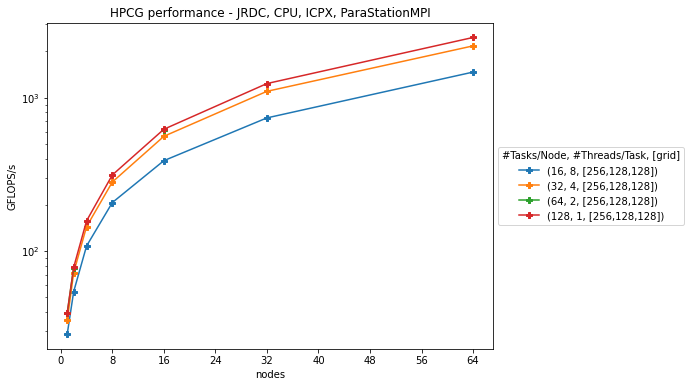

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, CPU, ICPX, ParaStationMPI")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[0], label[1], "[256,128,128]")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker="P")
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [2]:
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using GCC and ParaStationMPI (000097, 000098)
#grid size 256,128,128
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000097/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000098/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data = pd.concat([run_data, run_data2])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode',
       'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem',
       'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY',
       'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce',
       'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'],
      dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,...,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,97,JRDC,2022-gps,1,16,8,True,256.0,128.0,128.0,...,9.61613,5.07447,10.8690,7.41544,10.8635,10.7461,1.0,641.90,10772880,COMPLETED
1,97,JRDC,2022-gps,1,32,4,True,256.0,128.0,128.0,...,17.96220,10.63330,18.4646,15.55000,19.2759,18.3583,1.0,743.50,10772879,COMPLETED
2,97,JRDC,2022-gps,1,64,2,True,256.0,128.0,128.0,...,30.14560,8.38616,17.7674,14.36440,30.1725,29.8572,1.0,754.81,10772878,COMPLETED
3,97,JRDC,2022-gps,1,128,1,True,256.0,128.0,128.0,...,37.47120,5.10316,39.8597,34.00610,35.6653,35.3074,1.0,1280.29,10772877,COMPLETED
4,97,JRDC,2022-gps,2,16,8,True,256.0,128.0,128.0,...,19.02760,4.39882,12.2127,9.40327,21.5575,21.3199,1.0,647.39,10772884,COMPLETED
5,97,JRDC,2022-gps,2,32,4,True,256.0,128.0,128.0,...,35.02000,10.42390,26.3548,20.83040,36.9419,35.8647,1.0,765.74,10772883,COMPLETED
6,97,JRDC,2022-gps,2,64,2,True,256.0,128.0,128.0,...,61.42010,11.91040,20.1495,16.68330,60.5966,59.9593,1.0,753.00,10772882,COMPLETED
7,97,JRDC,2022-gps,2,128,1,True,256.0,128.0,128.0,...,75.56720,10.27690,37.9057,30.06140,72.1758,71.4329,1.0,1272.53,10772881,COMPLETED
8,97,JRDC,2022-gps,4,16,8,True,256.0,128.0,128.0,...,37.43780,7.07809,19.7989,15.28680,41.4063,40.9466,1.0,676.93,10772888,COMPLETED
9,97,JRDC,2022-gps,4,32,4,True,256.0,128.0,128.0,...,70.77470,19.15650,28.0477,24.40530,73.5972,71.4376,1.0,770.03,10772887,COMPLETED


,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,JRDC,2022-gps,1,16,8,10.7461
1,JRDC,2022-gps,1,32,4,18.3583
2,JRDC,2022-gps,1,64,2,29.8572
3,JRDC,2022-gps,1,128,1,35.3074
4,JRDC,2022-gps,2,16,8,21.3199
5,JRDC,2022-gps,2,32,4,35.8647
6,JRDC,2022-gps,2,64,2,59.9593
7,JRDC,2022-gps,2,128,1,71.4329
8,JRDC,2022-gps,4,16,8,40.9466
9,JRDC,2022-gps,4,32,4,71.4376


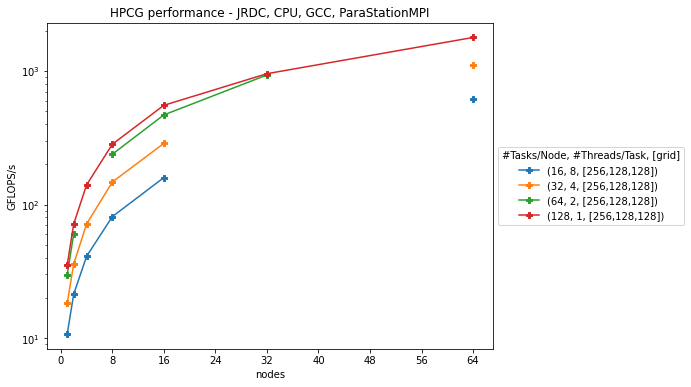

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, CPU, GCC, ParaStationMPI")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[0], label[1], "[256,128,128]")
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker="P")
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [3]:
#grid size 256,128,128
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using GCC and OpenMPI (000089,92,93)
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000089/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000092/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000093/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using ICPX and ParaStationMPI (000094,95)
fname4 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000094/result/table_csv.dat"
fname5 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000095/result/table_csv.dat"
run_data4 = pd.read_csv(fname4, sep=",", engine='python')
run_data5 = pd.read_csv(fname5, sep=",", engine='python')
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using GCC and ParaStationMPI (000097, 000098)
fname6 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000097/result/table_csv.dat"
fname7 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000098/result/table_csv.dat"
run_data6 = pd.read_csv(fname6, sep=",", engine='python')
run_data7 = pd.read_csv(fname7, sep=",", engine='python')

run_data = pd.concat([run_data, run_data2, run_data3, run_data4, run_data5, run_data6, run_data7])
display(run_data.columns)
display(run_data)


Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,89,JRDC,2022-go,1,16,8,True,256.0,128.0,128.0,47.9904,66.6554,15.4036,82.0589,81.1854,4.88844,29.5614,40.4027,9.66614,4.05583,11.5885,8.74921,10.8205,10.7053,1.0,645.98,10770635,COMPLETED
1,89,JRDC,2022-go,1,32,4,True,256.0,128.0,128.0,95.9805,118.9770,27.4946,146.4720,145.0170,6.59769,27.9042,40.8049,18.18440,9.34517,17.6863,15.12590,19.3149,19.1231,1.0,722.03,10770634,COMPLETED
2,89,JRDC,2022-go,1,64,2,True,256.0,128.0,128.0,191.9610,197.1370,45.5562,242.6930,240.0620,8.36182,27.0909,41.1293,32.64710,12.67550,17.0780,15.08450,32.0045,31.6575,1.0,715.93,10770633,COMPLETED
3,89,JRDC,2022-go,1,128,1,True,256.0,128.0,128.0,383.9210,226.6210,52.3697,278.9910,276.0530,10.98040,26.7069,41.3559,38.09070,13.79140,29.4160,22.75990,36.7916,36.4041,1.0,1239.02,10770632,COMPLETED
4,89,JRDC,2022-go,2,16,8,True,256.0,128.0,128.0,95.9805,131.7000,30.4348,162.1350,160.3710,9.64780,58.4422,81.1636,19.08690,5.78595,14.0414,12.24120,21.3803,21.1477,1.0,656.92,10770639,COMPLETED
5,89,JRDC,2022-go,2,32,4,True,256.0,128.0,128.0,191.9610,232.0930,53.6342,285.7270,282.8540,10.36070,55.9464,82.2129,35.84100,13.91450,22.0187,19.26140,37.6796,37.3006,1.0,741.54,10770638,COMPLETED
6,89,JRDC,2022-go,2,64,2,True,256.0,128.0,128.0,383.9210,371.1430,85.7671,456.9100,452.1040,16.23520,54.2321,84.0606,60.55850,12.08180,20.0648,16.87230,60.2545,59.6207,1.0,760.10,10770637,COMPLETED
7,89,JRDC,2022-go,2,128,1,True,256.0,128.0,128.0,767.8420,446.3020,103.1350,549.4370,543.7320,17.52370,53.1846,82.1309,76.09920,9.55222,40.5701,29.65380,72.4577,71.7054,1.0,1264.83,10770636,COMPLETED
8,89,JRDC,2022-go,4,16,8,True,256.0,128.0,128.0,191.9610,260.6590,60.2386,320.8980,311.1790,14.46610,116.9850,162.4770,38.23510,9.05818,16.0900,13.89160,42.3172,41.0356,1.0,674.62,10770643,COMPLETED
9,89,JRDC,2022-go,4,32,4,True,256.0,128.0,128.0,383.9210,457.1840,105.6550,562.8400,546.3080,16.99660,112.1880,164.1570,71.48760,15.33090,27.0145,23.42610,74.2232,72.0432,1.0,762.44,10770642,COMPLETED


,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,JRDC,2022-go,1,16,8,10.7053
1,JRDC,2022-go,1,32,4,19.1231
2,JRDC,2022-go,1,64,2,31.6575
3,JRDC,2022-go,1,128,1,36.4041
4,JRDC,2022-go,2,16,8,21.1477
5,JRDC,2022-go,2,32,4,37.3006
6,JRDC,2022-go,2,64,2,59.6207
7,JRDC,2022-go,2,128,1,71.7054
8,JRDC,2022-go,4,16,8,41.0356
9,JRDC,2022-go,4,32,4,72.0432


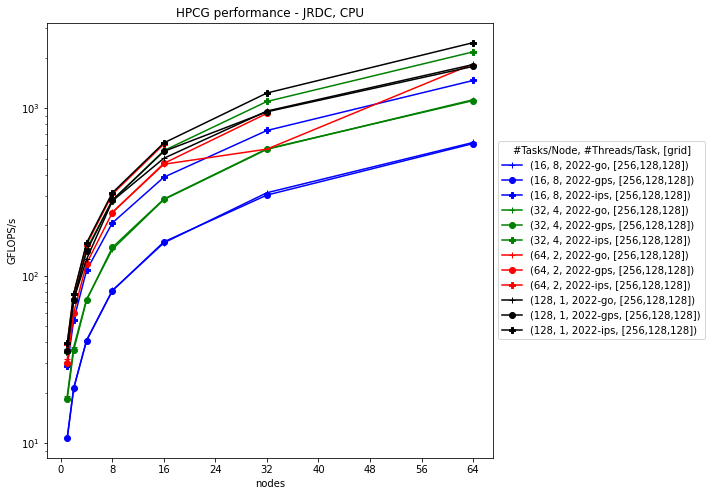

In [4]:
def select_marker(mod):
    #print("mod=%s", mod)
    if mod == "2022-go":
        return "+"
    elif mod == "2022-io":
        return "x"
    elif mod == "2022-gps":
        return "o"
    elif mod == "2022-ips":
        return "P"

def select_color(threadspertask):
    if threadspertask == 1:
        return "black"
    elif threadspertask == 2:
        return "red"
    elif threadspertask == 4:
        return "green"
    elif threadspertask == 8:
        return "blue"
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, CPU")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[0], label[1], label[3], "[256,128,128]")
    m = select_marker(label[2])
    c = select_color(label[1])
    #print("m=%s", m)
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker=m, color=c)
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [5]:
#08.09.2022: included missing cmake option "-DCMAKE_RELEASE_TYPE=Release",
#which activates compiler optimisation switches
#grid size 256,128,128
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using GCC and OpenMPI
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000111/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000112/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000113/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
#HPCG CPU on 1,2,4,8,16,32,64,128,256 nodes of JRDC using ICPX and OpenMPI
fname4 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000114/result/table_csv.dat"
fname5 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000115/result/table_csv.dat"
fname6 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000116/result/table_csv.dat"
fname7 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000117/result/table_csv.dat"
fname8 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000118/result/table_csv.dat"
run_data4 = pd.read_csv(fname4, sep=",", engine='python')
run_data5 = pd.read_csv(fname5, sep=",", engine='python')
run_data6 = pd.read_csv(fname6, sep=",", engine='python')
run_data7 = pd.read_csv(fname7, sep=",", engine='python')
run_data8 = pd.read_csv(fname8, sep=",", engine='python')

run_data = pd.concat([run_data, run_data2, run_data3, run_data4, run_data5, run_data6, run_data7, run_data8])
display(run_data.columns)
display(run_data)


Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,111,JRDC,2022-go,16,16,8,True,256.0,128.0,128.0,767.8420,2626.060,606.8500,3232.910,3172.710,61.16810,474.2630,654.2250,450.2970,22.46330,34.3435,29.38630,426.3440,418.4050,1.0,463.25,10807755.0,COMPLETED
1,111,JRDC,2022-go,16,32,4,True,256.0,128.0,128.0,1535.6800,3597.720,831.3860,4429.100,4375.060,120.36900,448.0270,665.5730,621.3350,20.30710,26.1544,22.69650,584.1050,576.9780,1.0,546.04,10807754.0,COMPLETED
2,111,JRDC,2022-go,16,64,2,True,256.0,128.0,128.0,3071.3700,3752.310,867.1110,4619.430,4582.260,141.79600,430.4340,675.4670,645.0250,16.38550,24.0308,19.08710,609.2070,604.3060,1.0,736.45,10807753.0,COMPLETED
3,111,JRDC,2022-go,16,128,1,True,256.0,128.0,128.0,6142.7300,3846.610,888.9000,4735.510,4705.740,186.41800,426.9720,665.6060,653.5160,10.23410,31.0970,16.16320,624.5220,620.5960,1.0,1166.48,10807752.0,COMPLETED
4,111,JRDC,2022-go,32,16,8,True,256.0,128.0,128.0,1535.6800,5003.860,1156.3300,6160.190,6047.040,104.05200,955.9200,1314.2400,866.6490,27.08120,35.8949,31.00290,812.3980,797.4770,1.0,437.73,10807759.0,COMPLETED
5,111,JRDC,2022-go,32,32,4,True,256.0,128.0,128.0,3071.3700,7118.880,1645.1600,8764.040,8489.360,190.81200,895.7430,1328.7800,1258.8800,23.88570,32.4043,26.55860,1155.7900,1119.5600,1.0,540.67,10807758.0,COMPLETED
6,111,JRDC,2022-go,32,64,2,True,256.0,128.0,128.0,6142.7300,7504.230,1734.1300,9238.350,9165.760,239.61000,862.0410,1347.6000,1311.9300,16.29080,28.4965,19.43930,1218.3600,1208.7900,1.0,736.75,10808001.0,COMPLETED
7,111,JRDC,2022-go,32,128,1,True,256.0,128.0,128.0,12285.5000,7658.070,1769.6700,9427.750,9367.700,367.62600,850.4570,1342.7000,1298.9000,12.76560,31.9112,18.40260,1243.3500,1235.4300,1.0,1183.04,10807756.0,COMPLETED
0,112,JRDC,2022-go,64,16,8,True,256.0,128.0,128.0,3071.3700,9873.910,2281.7300,12155.600,11940.500,174.84300,1912.0200,2628.6400,1756.9600,30.76100,42.0825,35.29410,1603.0800,1574.7100,1.0,439.85,10807763.0,COMPLETED
1,112,JRDC,2022-go,64,32,4,True,256.0,128.0,128.0,6142.7300,14115.900,3262.1500,17378.000,16835.600,348.69300,1783.3400,2656.1400,2520.1600,25.54000,34.5409,28.75280,2291.8100,2220.2700,1.0,546.37,10807762.0,COMPLETED


,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,JRDC,2022-go,1,16,8,30.0846
1,JRDC,2022-go,1,32,4,37.0522
2,JRDC,2022-go,1,64,2,39.2836
3,JRDC,2022-go,1,128,1,39.4502
4,JRDC,2022-go,2,16,8,57.8767
5,JRDC,2022-go,2,32,4,74.1822
6,JRDC,2022-go,2,64,2,78.8434
7,JRDC,2022-go,2,128,1,78.3683
8,JRDC,2022-go,4,16,8,112.7730
9,JRDC,2022-go,4,32,4,149.7600


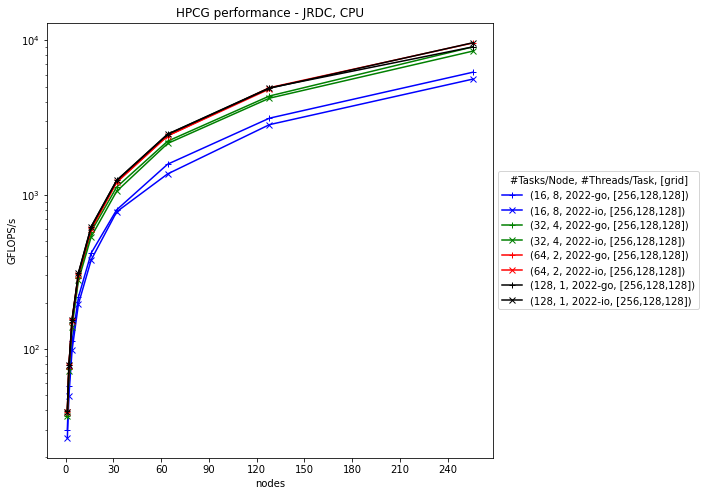

In [9]:
def select_marker(mod):
    #print("mod=%s", mod)
    if mod == "2022-go":
        return "+"
    elif mod == "2022-io":
        return "x"
    elif mod == "2022-gps":
        return "o"
    elif mod == "2022-ips":
        return "P"

def select_color(threadspertask):
    if threadspertask == 1:
        return "black"
    elif threadspertask == 2:
        return "red"
    elif threadspertask == 4:
        return "green"
    elif threadspertask == 8:
        return "blue"
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
#plt.xscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, CPU")

grouped = run_data.groupby(['system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
display(grouped[['system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])

for label, df in grouped.groupby(['taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[0], label[1], label[3], "[256,128,128]")
    m = select_marker(label[2])
    c = select_color(label[1])
    #print("m=%s", m)
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker=m, color=c)
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(
    palette=sns.color_palette("Paired"),
    color_codes=False,
    rc={
        "figure.figsize": (12, 8)
    }
)

In [49]:
#HPCG ROCm on 1 and 2 nodes of JRDC using GCC and OpenMPI
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000129/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000130/result/table_csv.dat"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000131/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data3 = pd.read_csv(fname3, sep=",", engine='python')

run_data = pd.concat([run_data, run_data2])
run_data['GF_Total_ref'] = run_data.loc[:, 'GF_Total']
run_data3['GF_Total_opt'] = run_data3.loc[:, 'GF_Total']
run_data = pd.concat([run_data, run_data3]).reset_index()
run_data['GF_Total_opt'][0]=run_data.loc[2, 'GF_Total_opt']
run_data['GF_Total_opt'][1]=run_data.loc[3, 'GF_Total_opt']

display(run_data.columns)
display(run_data)


/tmp/ipykernel_19705/1378024159.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_data['GF_Total_opt'][0]=run_data.loc[2, 'GF_Total_opt']
/tmp/ipykernel_19705/1378024159.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_data['GF_Total_opt'][1]=run_data.loc[3, 'GF_Total_opt']


Index(['index', 'jube_benchmark_id', 'system', 'modules', 'nodes',
       'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz',
       'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT',
       'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce',
       'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]',
       'job_id', 'status', 'GF_Total_ref', 'GF_Total_opt'],
      dtype='object')

,index,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,...,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status,GF_Total_ref,GF_Total_opt
0,0,129,JRDC,2022-go,1,8,2,True,560,280,...,0.256706,0.196252,1843.32,1660.83,1,923.93,10825666,COMPLETED,1660.83,1714.63
1,0,130,JRDC,2022-go,2,8,2,True,560,280,...,0.266169,0.208934,3200.38,2884.13,1,970.75,10825760,COMPLETED,2884.13,2990.00
2,0,131,JRDC,2022-go,1,8,2,True,560,280,...,0.382220,0.264973,1908.88,1714.63,1,930.10,10825940,COMPLETED,NaN,1714.63
3,1,131,JRDC,2022-go,2,8,2,True,560,280,...,0.518071,0.392875,3381.82,2990.00,1,975.76,10825941,COMPLETED,NaN,2990.00


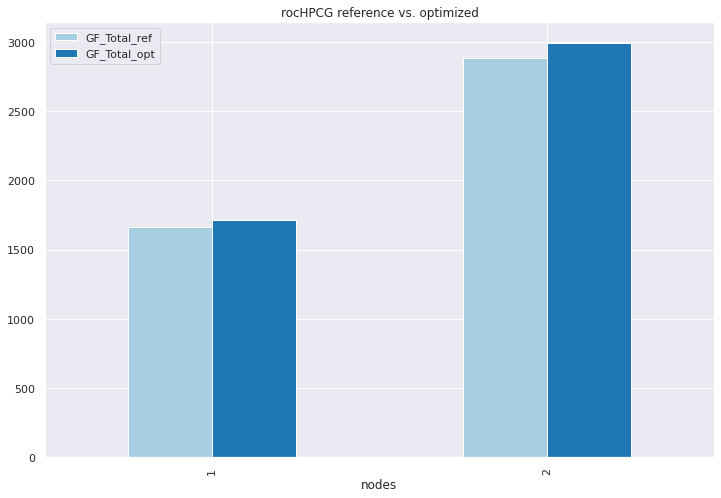

In [50]:
run_data[0:2].plot(x="nodes",y=["GF_Total_ref","GF_Total_opt"],kind="bar",title="rocHPCG reference vs. optimized");

In [1]:
#08.09.2022: included missing cmake option "-DCMAKE_RELEASE_TYPE=Release",
#which activates compiler optimisation switches
#grid size 256,128,128
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
#HPCG CPU on 1,2,4,8,16,32,64 nodes of JRDC using GCC and OpenMPI
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000136/result/table_csv.dat"
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000137/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data2 = pd.read_csv(fname2, sep=",", engine='python')

run_data = pd.concat([run_data, run_data2])
display(run_data.columns)
display(run_data)


Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode',
       'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem',
       'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY',
       'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce',
       'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'],
      dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,...,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2094.23,0.109605,0.397127,0.278968,1913.87,1719.98,1,685.57,10829179,COMPLETED
1,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2093.76,0.079874,0.336597,0.257039,1912.97,1665.06,1,688.39,10829180,COMPLETED
2,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2090.88,0.150524,0.418302,0.271431,1909.75,1720.53,1,709.50,10829181,COMPLETED
3,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2092.59,0.103397,0.385292,0.260857,1912.37,1722.83,1,683.34,10829182,COMPLETED
4,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2092.52,0.182869,0.382233,0.258616,1911.82,1722.43,1,709.69,10829183,COMPLETED
5,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2092.25,0.097865,0.398385,0.261985,1912.90,1723.51,1,681.57,10829184,COMPLETED
6,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2093.64,0.128867,0.312965,0.240761,1914.28,1724.64,1,709.04,10829185,COMPLETED
7,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2093.11,0.099139,0.390161,0.254227,1912.93,1723.53,1,687.40,10829186,COMPLETED
8,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2092.91,0.146808,0.353475,0.283453,1911.56,1722.19,1,710.26,10829187,COMPLETED
9,136,JRDC,2022-go,1,8,4,True,560,280,280,...,2092.70,0.109165,0.435247,0.302949,1912.42,1722.34,1,686.41,10829188,COMPLETED


,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,GF_Total,gftotstddev
0,136,JRDC,2022-go,1,8,4,1716.704,18.19812
1,136,JRDC,2022-go,2,8,4,3201.767,14.19615
2,137,JRDC,2022-go,1,8,4,1660.634,5.91975
3,137,JRDC,2022-go,2,8,4,3028.994,17.97822


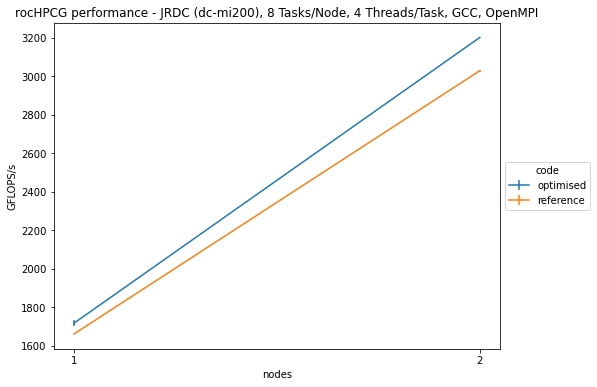

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("rocHPCG performance - JRDC (dc-mi200), 8 Tasks/Node, 4 Threads/Task, GCC, OpenMPI")

grouped = run_data.groupby(['jube_benchmark_id','system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
grouped_stddev = run_data.groupby(['jube_benchmark_id','system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).std().reset_index()
grouped = grouped.assign(gftotstddev=grouped_stddev['GF_Total'])
display(grouped[['jube_benchmark_id','system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total', 'gftotstddev']])

for label, df in grouped.groupby(['jube_benchmark_id','taskspernode', 'threadspertask', 'system', 'modules']):
    if label[0]==136:
        label="optimised"
    elif label[0]==137:
        label="reference"
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, yerr=df['gftotstddev'])
    #df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker="+")
    
plt.legend(title='code', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [11]:
#14.10.2022
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
#HPCG CPU on 1 node of JRDC using Intel and PSMPI
#x=256
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000138/result/table_csv.dat"
#x=192
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000139/result/table_csv.dat"
#x=192, cmake option "-DHPCG_CONTIGUOUS_ARRAYS=ON"
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000140/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data = run_data.assign(griddim=["256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128","256x128x128"])
run_data = run_data[:4]
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data2 = run_data2.assign(griddim=["192x128x128","192x128x128","192x128x128","192x128x128"])
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
run_data3 = run_data3.assign(griddim=["192x128x128","192x128x128","192x128x128","192x128x128"])

run_data = pd.concat([run_data, run_data2, run_data3])
display(run_data.columns)
display(run_data)


Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status', 'griddim'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status,griddim
0,138,JRDC,2022-ips,1,16,8,True,256,128,128,47.9904,170.309,39.3573,209.667,205.307,5.03619,29.7049,40.8174,28.4920,2.01599,25.8909,19.98650,27.6471,27.0722,1,441.59,10994105,COMPLETED,256x128x128
1,138,JRDC,2022-ips,1,32,4,True,256,128,128,95.9805,232.405,53.7119,286.116,271.833,9.35024,27.7979,41.2478,39.7883,7.02052,18.6047,12.54260,37.7288,35.8453,1,524.27,10994104,COMPLETED,256x128x128
2,138,JRDC,2022-ips,1,64,2,True,256,128,128,191.9610,242.239,55.9788,298.217,295.840,10.45100,26.9437,41.8601,41.5178,4.08030,19.4738,12.03700,39.3267,39.0131,1,706.46,10994103,COMPLETED,256x128x128
3,138,JRDC,2022-ips,1,128,1,True,256,128,128,383.9210,241.421,55.7898,297.211,295.371,12.16460,26.5937,41.8517,40.9068,1.93204,28.9531,14.81460,39.1943,38.9516,1,1153.42,10994102,COMPLETED,256x128x128
0,139,JRDC,2022-ips,1,16,8,True,192,128,128,35.9943,172.400,39.8405,212.241,207.714,5.33336,32.1376,40.2948,28.7568,2.45218,23.5689,17.60240,27.9864,27.3895,1,396.24,10994147,COMPLETED,192x128x128
1,139,JRDC,2022-ips,1,32,4,True,192,128,128,71.9883,233.518,53.9694,287.488,272.921,9.14255,28.5317,41.0289,40.1190,5.98790,17.1024,11.90310,37.9094,35.9886,1,445.11,10994146,COMPLETED,192x128x128
2,139,JRDC,2022-ips,1,64,2,True,192,128,128,143.9760,244.134,56.4169,300.551,298.111,10.19460,27.3447,41.6377,42.0420,4.85093,19.7908,11.78740,39.6342,39.3123,1,622.78,10994145,COMPLETED,192x128x128
3,139,JRDC,2022-ips,1,128,1,True,192,128,128,287.9520,242.665,56.0773,298.743,296.788,24.54810,26.7150,41.6771,39.8606,2.85548,19.0629,9.41786,39.3962,39.1384,1,861.98,10994144,COMPLETED,192x128x128
0,140,JRDC,2022-ips,1,16,8,True,192,128,128,35.9943,171.281,39.5819,210.863,206.285,5.12058,32.0566,40.5768,28.6251,1.99726,25.2102,19.55100,27.8047,27.2011,1,398.86,10994168,COMPLETED,192x128x128
1,140,JRDC,2022-ips,1,32,4,True,192,128,128,71.9883,234.393,54.1714,288.564,274.151,8.77041,28.5695,41.1865,40.4333,6.47023,17.9863,11.83580,38.0513,36.1508,1,442.46,10994167,COMPLETED,192x128x128


,jube_benchmark_id,griddim,system,modules,nodes,taskspernode,threadspertask,GF_Total
0,138,256x128x128,JRDC,2022-ips,1,16,8,27.0722
1,138,256x128x128,JRDC,2022-ips,1,32,4,35.8453
2,138,256x128x128,JRDC,2022-ips,1,64,2,39.0131
3,138,256x128x128,JRDC,2022-ips,1,128,1,38.9516
4,139,192x128x128,JRDC,2022-ips,1,16,8,27.3895
5,139,192x128x128,JRDC,2022-ips,1,32,4,35.9886
6,139,192x128x128,JRDC,2022-ips,1,64,2,39.3123
7,139,192x128x128,JRDC,2022-ips,1,128,1,39.1384
8,140,192x128x128,JRDC,2022-ips,1,16,8,27.2011
9,140,192x128x128,JRDC,2022-ips,1,32,4,36.1508


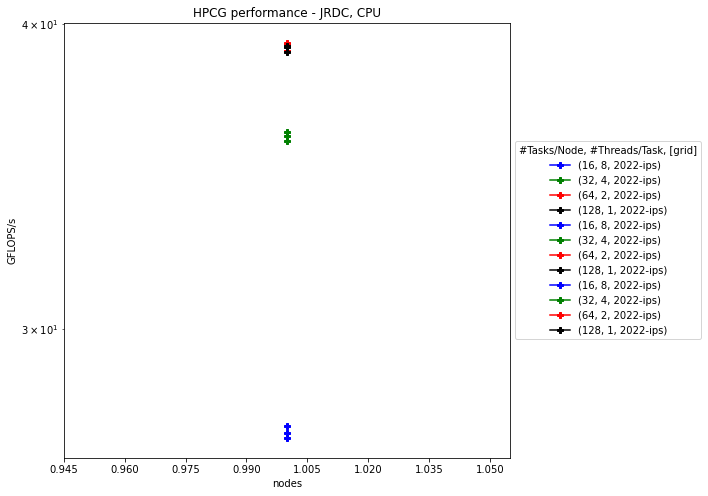

In [14]:
def select_marker(mod):
    #print("mod=%s", mod)
    if mod == "2022-go":
        return "+"
    elif mod == "2022-io":
        return "x"
    elif mod == "2022-gps":
        return "o"
    elif mod == "2022-ips":
        return "P"

def select_color(threadspertask):
    if threadspertask == 1:
        return "black"
    elif threadspertask == 2:
        return "red"
    elif threadspertask == 4:
        return "green"
    elif threadspertask == 8:
        return "blue"
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
#plt.xscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, CPU")

grouped = run_data.groupby(['jube_benchmark_id', 'griddim', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask']).mean().reset_index()
display(grouped[['jube_benchmark_id', 'griddim', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total']])

for label, df in grouped.groupby(['jube_benchmark_id', 'griddim', 'taskspernode', 'threadspertask', 'system', 'modules']):
    label = (label[2], label[3], label[5])
    m = select_marker(label[2])
    c = select_color(label[1])
    #print("m=%s", m)
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker=m, color=c)
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [1]:
#14.10.2022
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
#HPCG CPU on 1 node of JRDC using Intel and PSMPI
#x=192
fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000094/result/table_csv.dat"
run_data = pd.read_csv(fname, sep=",", engine='python')
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000095/result/table_csv.dat"
run_data2 = pd.read_csv(fname2, sep=",", engine='python')
run_data2['jube_benchmark_id'] = run_data2['jube_benchmark_id'].replace(to_replace=95, value=94)
fname3 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000141/result/table_csv.dat"
run_data3 = pd.read_csv(fname3, sep=",", engine='python')
fname4 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000142/result/table_csv.dat"
run_data4 = pd.read_csv(fname4, sep=",", engine='python')
run_data4['jube_benchmark_id'] = run_data4['jube_benchmark_id'].replace(to_replace=142, value=141)
fname5 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000143/result/table_csv.dat"
run_data5 = pd.read_csv(fname5, sep=",", engine='python')
run_data5['jube_benchmark_id'] = run_data5['jube_benchmark_id'].replace(to_replace=143, value=141)

run_data = pd.concat([run_data, run_data2, run_data3, run_data4, run_data5])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode',
       'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem',
       'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY',
       'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce',
       'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'],
      dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,...,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,94,JRDC,2022-ips,1,16,8,True,256.0,128.0,128.0,...,28.6839,4.03686,16.2275,12.14990,29.3103,28.6768,1.0,419.43,10772657,COMPLETED
1,94,JRDC,2022-ips,1,32,4,True,256.0,128.0,128.0,...,39.3356,7.99362,22.2152,15.36480,37.0485,35.1989,1.0,535.35,10772656,COMPLETED
2,94,JRDC,2022-ips,1,64,2,True,256.0,128.0,128.0,...,41.0977,5.75518,20.0703,11.10260,39.5465,39.2261,1.0,702.96,10772655,COMPLETED
3,94,JRDC,2022-ips,1,128,1,True,256.0,128.0,128.0,...,41.0840,2.28637,24.8916,9.66826,39.7361,39.4918,1.0,1139.31,10772654,COMPLETED
4,94,JRDC,2022-ips,2,16,8,True,256.0,128.0,128.0,...,53.7239,5.59454,29.5349,18.62130,55.3544,54.1937,1.0,444.24,10772661,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,141,JRDC,2022-ips,128,128,1,True,192.0,128.0,128.0,...,5148.7300,7.66997,40.0405,22.99150,4898.2500,4862.7900,NaN,910.00,10996336,COMPLETED
4,141,JRDC,2022-ips,256,16,8,True,192.0,128.0,128.0,...,6126.1500,26.12460,63.2583,44.46030,5557.1300,5452.6500,NaN,425.67,10996343,COMPLETED
5,141,JRDC,2022-ips,256,32,4,True,192.0,128.0,128.0,...,9737.9100,28.84300,50.3474,36.83550,8553.8200,8437.4500,NaN,493.59,10996342,COMPLETED
6,141,JRDC,2022-ips,256,64,2,True,192.0,128.0,128.0,...,10696.7000,18.21570,35.0153,23.58850,9454.7100,9365.5200,NaN,579.52,10996341,COMPLETED


,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,GF_Total,nx
0,94,JRDC,2022-ips,1,16,8,28.6768,256.0
1,94,JRDC,2022-ips,1,32,4,35.1989,256.0
2,94,JRDC,2022-ips,1,64,2,39.2261,256.0
3,94,JRDC,2022-ips,1,128,1,39.4918,256.0
4,94,JRDC,2022-ips,2,16,8,54.1937,256.0
5,94,JRDC,2022-ips,2,32,4,72.1417,256.0
6,94,JRDC,2022-ips,2,64,2,77.7693,256.0
7,94,JRDC,2022-ips,2,128,1,78.0952,256.0
8,94,JRDC,2022-ips,4,16,8,107.5570,256.0
9,94,JRDC,2022-ips,4,32,4,143.8570,256.0


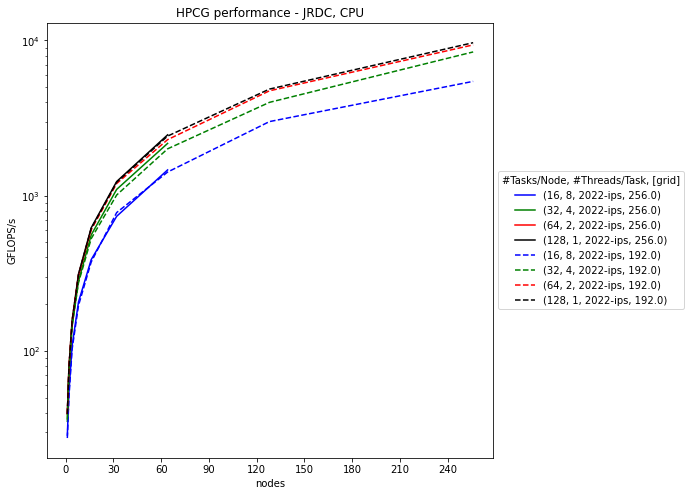

In [2]:
def select_linestyle(nx):
    #print("mod=%s", mod)
    if nx == 192:
        return "dashed"
    elif nx == 256:
        return "solid"

def select_marker(nx):
    #print("mod=%s", mod)
    if nx == 192:
        return "+"
    elif nx == 256:
        return "x"

def select_color(threadspertask):
    if threadspertask == 1:
        return "black"
    elif threadspertask == 2:
        return "red"
    elif threadspertask == 4:
        return "green"
    elif threadspertask == 8:
        return "blue"
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
#plt.xscale('log')
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.title("HPCG performance - JRDC, CPU")

grouped = run_data.groupby(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'nx']).mean().reset_index()
display(grouped[['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'GF_Total', 'nx']])

for label, df in grouped.groupby(['jube_benchmark_id', 'taskspernode', 'threadspertask', 'system', 'modules', 'nx']):
    label = (label[1], label[2], label[4], label[5])
    m = select_marker(label[2])
    c = select_color(label[1])
    l = select_linestyle(label[3])
    #print("m=%s", m)
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker=m, color=c, linestyle=l)
plt.legend(title='#Tasks/Node, #Threads/Task, [grid]', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [22]:
#17.10.2022
#grid size 192,128,128
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

#insert path of CSV-formatted result table /path/to/benchmarks/<JUBE ID>/result/table_csv.dat
#HPCG CPU on 1,2,4,8,16 nodes of JRDC using ICX and PSMPI
#each HPCG run was repeated 3 times
#fname = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000144/result/table_csv.dat"
#run_data = pd.read_csv(fname, sep=",", engine='python')
fname2 = "/p/project/ccstao/mirus1/hpcg.exascale/benchmark/jube/bench_run/000146/result/table_csv.dat"
run_data = pd.read_csv(fname2, sep=",", engine='python')

#run_data = pd.concat([run_data, run_data2])
display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,146,JRDC,2022-ips,1,16,8,False,192,128,128,35.9943,183.541,42.4150,225.956,220.642,7.23091,31.9284,40.6116,30.1808,6.96040,34.9236,24.7213,29.7949,29.0941,1,689.24,10999379,COMPLETED
1,146,JRDC,2022-ips,1,16,8,False,192,128,128,35.9943,182.810,42.2460,225.056,219.834,7.08882,31.9756,40.6972,30.0727,7.21032,35.7632,25.6188,29.6762,28.9876,1,690.96,10999380,COMPLETED
2,146,JRDC,2022-ips,1,16,8,False,192,128,128,35.9943,183.825,42.4806,226.305,221.114,6.87980,32.0750,40.6682,30.3580,6.87483,36.9292,24.0995,29.8409,29.1564,1,687.70,10999381,COMPLETED
3,146,JRDC,2022-ips,1,32,4,False,192,128,128,71.9883,234.099,54.0982,288.197,284.459,9.71837,28.5148,41.1810,40.0172,6.30404,38.7678,23.2733,38.0035,37.5106,1,726.11,10999376,COMPLETED
4,146,JRDC,2022-ips,1,32,4,False,192,128,128,71.9883,233.687,54.0030,287.690,284.065,9.64285,28.4490,41.1374,39.9622,6.72607,40.6286,23.8321,37.9367,37.4587,1,727.73,10999377,COMPLETED
5,146,JRDC,2022-ips,1,32,4,False,192,128,128,71.9883,233.882,54.0481,287.930,284.308,9.80727,28.6367,41.1819,39.9354,7.14709,39.6513,23.3590,37.9683,37.4908,1,727.11,10999378,COMPLETED
6,146,JRDC,2022-ips,1,64,2,False,192,128,128,143.9760,243.800,56.3398,300.140,297.662,16.50370,27.3426,41.7525,40.6875,14.00750,29.2154,19.8160,39.5800,39.2532,1,911.10,10999373,COMPLETED
7,146,JRDC,2022-ips,1,64,2,False,192,128,128,143.9760,243.456,56.2602,299.716,297.228,15.84360,27.3963,41.8983,40.6708,14.55260,29.3659,19.7797,39.5241,39.1959,1,912.60,10999374,COMPLETED
8,146,JRDC,2022-ips,1,64,2,False,192,128,128,143.9760,242.804,56.1095,298.914,296.360,15.29810,27.4042,41.8150,40.6209,15.91430,30.6647,21.1130,39.4182,39.0814,1,916.37,10999375,COMPLETED
9,146,JRDC,2022-ips,1,128,1,False,192,128,128,287.9520,243.825,56.3452,300.170,298.284,10.10870,26.7200,41.8597,41.9906,4.69153,42.7743,16.5078,39.5844,39.3356,1,1239.05,10999370,COMPLETED


,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,GF_Total,gftotstddev
0,146,JRDC,2022-ips,1,16,8,False,29.07937,0.08536
1,146,JRDC,2022-ips,1,32,4,False,37.48670,0.02619
2,146,JRDC,2022-ips,1,64,2,False,39.17683,0.08747
3,146,JRDC,2022-ips,1,128,1,False,39.25743,0.07901
4,146,JRDC,2022-ips,2,16,8,False,52.22693,0.18681
5,146,JRDC,2022-ips,2,32,4,False,71.68797,0.71283
6,146,JRDC,2022-ips,2,64,2,False,78.42130,0.15465
7,146,JRDC,2022-ips,2,128,1,False,78.10653,0.07344
8,146,JRDC,2022-ips,4,16,8,False,103.61133,0.37906
9,146,JRDC,2022-ips,4,32,4,False,140.03333,1.60042


/p/software/jurecadc/stages/2022/software/matplotlib/3.4.3-gcccoremkl-11.2.0-2021.4.0/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


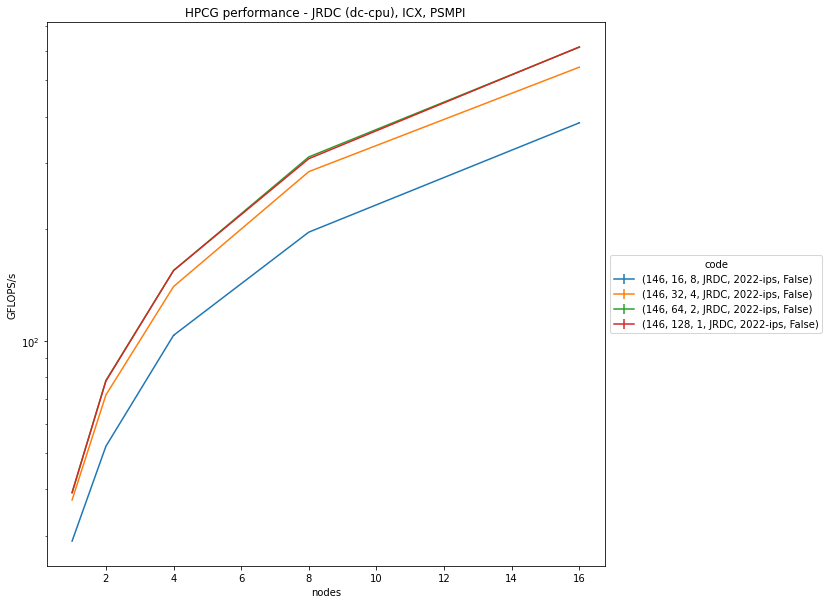

In [28]:
def select_linestyle(bind):
    if bind == True:
        return "dashed"
    elif bind == False:
        return "solid"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

#fig, ax = plt.subplots(figsize=(8,6))
fig, ax = plt.subplots(figsize=(10,10))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.yscale('log')
plt.title("HPCG performance - JRDC (dc-cpu), ICX, PSMPI")

grouped = run_data.groupby(['jube_benchmark_id','system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND']).mean().reset_index()
grouped_stddev = run_data.groupby(['jube_benchmark_id','system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND']).std().reset_index()
grouped = grouped.assign(gftotstddev=grouped_stddev['GF_Total'])
display(grouped[['jube_benchmark_id','system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'GF_Total', 'gftotstddev']])

for label, df in grouped.groupby(['jube_benchmark_id','taskspernode', 'threadspertask', 'system', 'modules', 'OMP_PROC_BIND']):
    l = select_linestyle(label[5])
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label, yerr=df['gftotstddev'], linestyle=l)
    #df.plot(x="nodes", y="GF_Total", ax=ax, label=label, marker="+")
    
plt.legend(title='code', loc='center left', bbox_to_anchor=(1.0, 0.5))